# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Import data

In [2]:
# Import data from URL and add column names
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

wine_df.columns = ['Label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                   'OD280/OD315 of diluted wines', 'Proline']

# Initial data exploration

In [7]:
# Top n rows
n = 10
wine_df.head(n)
wine_df.to_csv("wines.csv")

In [4]:
# Get shape of dataframe
wine_df.shape

(178, 14)

In [5]:
# Labels represent each of the three different types of wine
wine_df['Label'].value_counts()

2    71
1    59
3    48
Name: Label, dtype: int64

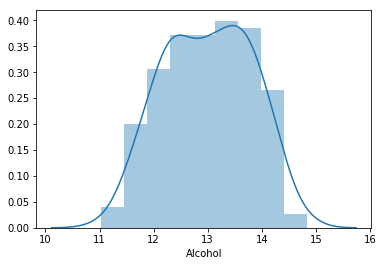

In [32]:
sns.distplot(wine_df['Alcohol'])
plt.show()

# Data transformations

In [7]:
# Separate labels, so we don't scale the categorical values
wine_features = wine_df.iloc[:, 1:]
wine_labels = wine_df.iloc[:, 0]

In [8]:
# Normalize data so each variable has appropriate influence
sc = StandardScaler()
wine_features_std = sc.fit_transform(wine_features)

In [9]:
# Convert numpy array to pandas dataframe and add columns back
wine_features_std = pd.DataFrame(wine_features_std)
wine_features_std.columns = wine_features.columns
wine_features_std.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# LDA

In [37]:
# create instance of LDA object
lda = LDA()

# fit standardized data
ld = lda.fit_transform(wine_features_std, wine_labels)
lda_df = pd.DataFrame(data=ld, columns = ['LDA1', 'LDA2'])

lda_df['Cluster'] = wine_labels

# Print results of classification of training data
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(wine_features_std, wine_labels)))

# TODO
# print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))

# Print top n observations of LDA df
lda_df.head()

Accuracy of LDA classifier on training set: 1.00


,LDA1,LDA2,Cluster
0,-4.700244,1.979138,1
1,-4.301958,1.170413,1
2,-3.420720,1.429101,1
3,-4.205754,4.002871,1
4,-1.509982,0.451224,1


In [38]:
lda.predict(wine_features_std)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

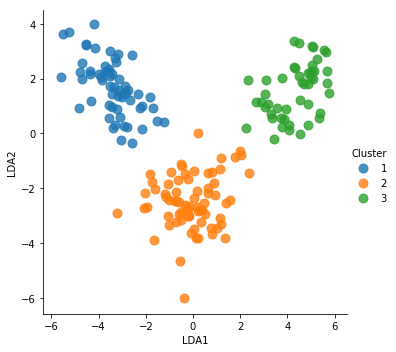

In [40]:
# Scatter plot of the first and second linear discriminant (LDA1, LDA2) clustered by wine label
sns.lmplot(x="LDA1", y="LDA2",
  data=lda_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

plt.show()

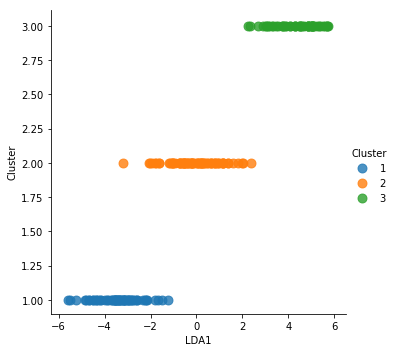

In [41]:
# Scatter plot of the first linear discriminant (LDA1) by wine label
sns.lmplot(x="LDA1", y="Cluster",
  data=lda_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size
plt.show()

# PCA

In [17]:
from sklearn.decomposition import PCA

In [42]:
wine_features.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
# Define number of principal components
# Source: https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/

pca = PCA(n_components=3)

# Fit to features
pc = pca.fit_transform(wine_features)

# Dataframe of principal components and wine labels
pc_df = pd.DataFrame(data = pc, 
        columns = ['PC1', 'PC2','PC3'])
pc_df['Cluster'] = wine_labels
pc_df.head()

,PC1,PC2,PC3,Cluster
0,318.562979,21.492131,3.130735,1
1,303.097420,-5.364718,6.822835,1
2,438.061133,-6.537309,-1.113223,1
3,733.240139,0.192729,-0.917257,1
4,-11.571428,18.489995,-0.554422,1


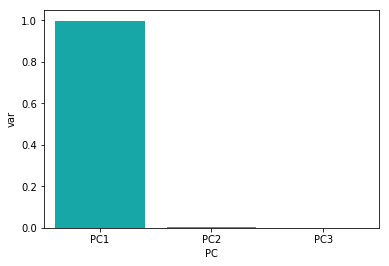

In [48]:
# Scree plot
# What went wrong?

pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC', y="var", data=pca_df, color="c")
plt.show()

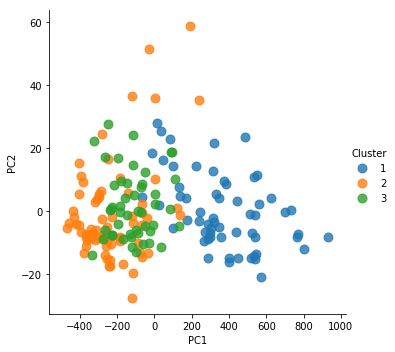

In [47]:
# Scatter plot of the first and second principal components (PC1, PC2) clustered by wine label
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size
plt.show()

In [50]:
# Define number of principal components
pca = PCA(n_components=3)

# Fit to features
pc = pca.fit_transform(wine_features_std)

# Dataframe of principal components and wine labels
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2','PC3'])
pc_df['Cluster'] = wine_labels
pc_df.head()

,PC1,PC2,PC3,Cluster
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


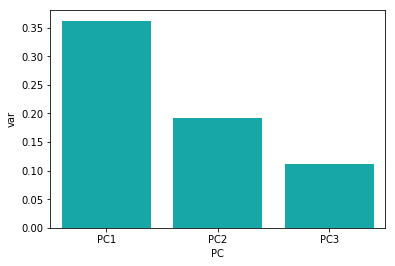

In [52]:
# Scree plot
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=pca_df, color="c")
plt.show()

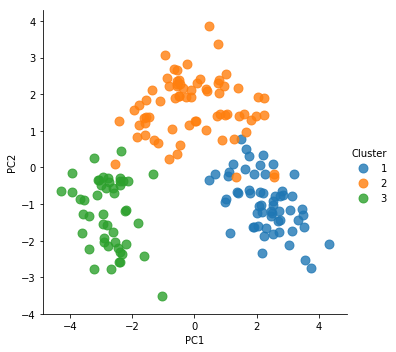

In [53]:
# Scatter plot of the first and second principal components (PC1, PC2) clustered by wine label
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size
plt.show()

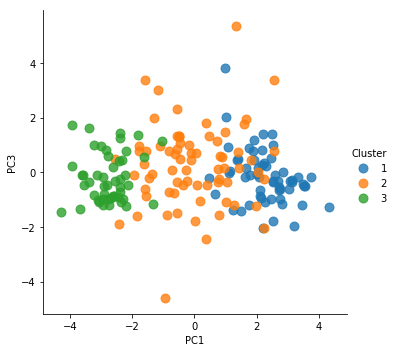

In [54]:
# Scatter plot of the first and third principal components (PC1, PC3) clustered by wine label
# What does this tell us?
sns.lmplot( x="PC1", y="PC3",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size
plt.show()

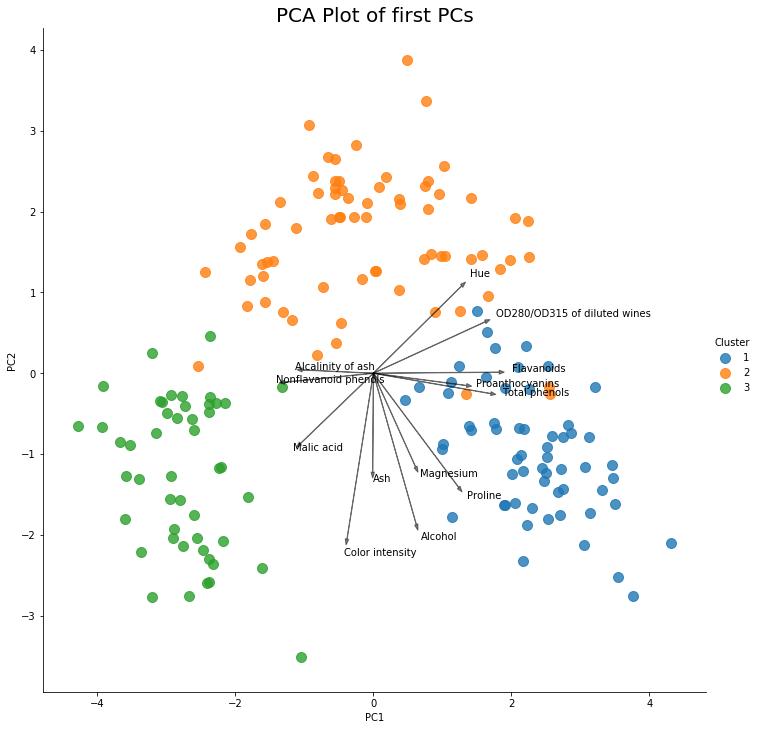

In [71]:
# PCA biplot

# Scatter plot based and assigned color based on 'label - y'
sns.lmplot('PC1', 'PC2', data=pc_df, fit_reg = False, height=10, hue = 'Cluster', scatter_kws={"s": 100})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = pca.components_[0]
yvector = pca.components_[1]
 
# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(wine_features_std)[:,0]
ys = pca.transform(wine_features_std)[:,1]
 
## visualize projections
 
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys), color='k', width=0.005, head_width=0.05, alpha=0.5)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1, list(wine_features.columns.values)[i], color='k')

plt.title('PCA Plot of first PCs',fontsize=20)
plt.show()

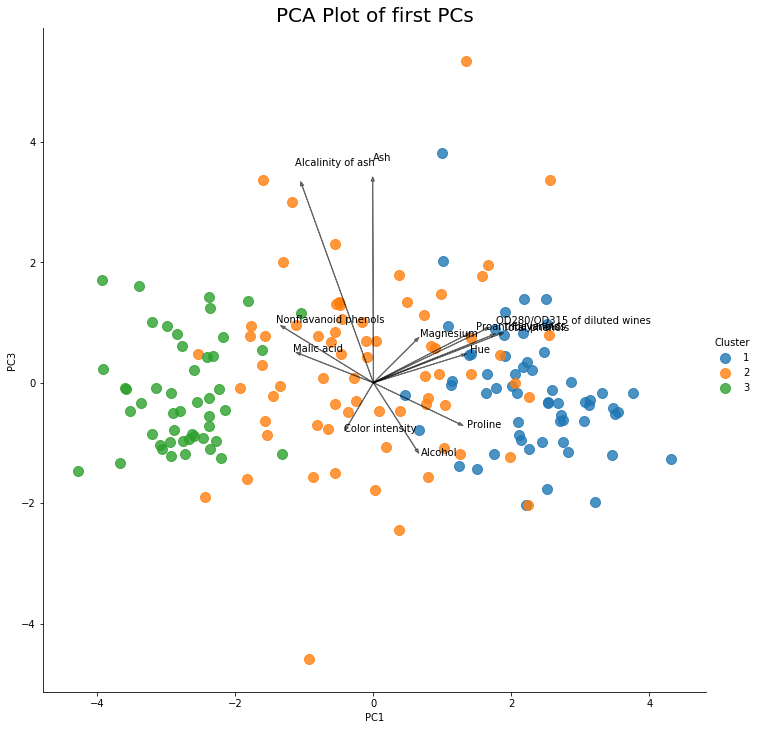

In [69]:
# PCA biplot
# Source: https://thehongwudotcom.wordpress.com/2016/02/28/biplot-in-python-optimized-with-color-scatter-plot/

# Scatter plot based and assigned color based on 'label - y'
sns.lmplot('PC1', 'PC3', data=pc_df, fit_reg = False, height=10, hue = 'Cluster', scatter_kws={"s": 100})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = pca.components_[0]
yvector = pca.components_[2]
 
# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(wine_features_std)[:,0]
ys = pca.transform(wine_features_std)[:,2]
 
## visualize projections
 
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys), color='k', width=0.005, head_width=0.05, alpha=0.5)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1, list(wine_features.columns.values)[i], color='k')

plt.title('PCA Plot of first PCs',fontsize=20)
plt.show()